In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=80f8745c9ab8d37cd93ca511502c4d832036c9618eeabb51416cdc5d878eb0b6
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install transformers

In [ ]:
pip install matplotlib

# Ονοματα:
# Νικολαος Μιχαλουτσος
# Ανδρεας Κοκκορας

# Ερώτημα 1:

Προεπεξεργασία δεδομένων:

In [ ]:

# Εγω ειχα τον φακελο data (unzipped) στο myDrive μου στο μονοπατι που φαινεται στην αρχικη γραμμη. Αλλαξτε το αναλογως με το που το εχετε εσεις.

################################################ ΠΡΟΕΠΕΞΕΡΓΑΣΙΑ ΔΕΔΟΜΕΝΩΝ ##############################################################
import pandas as pd
import numpy as np
import sys
import os
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Κατεβάζουμε τα stop words
nltk.download('stopwords')
nltk.download('punkt')

# Αποθηκεύουμε τα αγγλικά stop words
stop_words = set(stopwords.words('english'))

# Συνάρτηση για να αφαιρέσουμε τα emojis
def remove_emoji(text):
    return emoji.demojize(text, delimiters=("", ""))

def remove_html_tags(text):
    # Έλεγχος αν το κείμενο μοιάζει περισσότερο με όνομα αρχείου
    if '<' in text and '>' in text:
        # Εφαρμογή της BeautifulSoup μόνο αν το κείμενο περιέχει HTML tags
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()
    else:
        return text

# Συνάρτηση για να προετοιμάσουμε το κείμενο
def preprocess_text(text):
    # Αφαίρεση Html tags
    text = remove_html_tags(text)
    # Αφαίρεση URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Αφαίρεση hashtags
    text = re.sub(r'#\w+', '', text)
    # Αφαίρεση @mentions
    text = re.sub(r'@\w+', '', text)
    # Αφαίρεση emojis
    text = remove_emoji(text)
    # Αφαίρεση ειδικών χαρακτήρων
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    # Μετατροπή σε μικρά γράμματα
    text = text.lower()
    # Αφαίρεση σημείων στίξης
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    words = word_tokenize(text)
    # Αφαίρεση stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Συνάρτηση για αγγλικά σχόλια
def is_english(comment):
    try:
        return detect(comment) == 'en'
    except LangDetectException:
        return False

# Λίστα με τους κύριους φακέλους για τα έτη 2019 και 2023
main_folder_2019 = "/content/gdrive/My Drive/Tede/data/2019"
main_folder_2023 = "/content/gdrive/My Drive/Tede/data/2023"
main_folders = [main_folder_2019, main_folder_2023]

reviews_columns = ['listing_id', 'comments']

reviews_files_2019 = []
reviews_files_2023 = []

# Λίστες για την αποθήκευση των δεδομένων ανά έτος
reviews_dataframes_2019 = []
reviews_dataframes_2023 = []

for year in main_folders:
    # Επιλογή των υποφακέλων
    subfolders = [f for f in os.listdir(year) if os.path.isdir(os.path.join(year, f)) and f != "desktop.ini"]

    # Εξερεύνηση των υποφακέλων και εύρεση των αρχείων CSV
    for folder in subfolders:
        folder_path = os.path.join(year, folder)
        reviews_path = os.path.join(folder_path, "reviews.csv")
        if os.path.exists(reviews_path):
            if year == main_folder_2019:
                reviews_files_2019.append(reviews_path)
            else:
                reviews_files_2023.append(reviews_path)

    if year == main_folder_2019:
      for file in reviews_files_2019:
        df = pd.read_csv(file)[reviews_columns]
        reviews_dataframes_2019.append(df)
    else:
      for file in reviews_files_2023:
        df = pd.read_csv(file)[reviews_columns]
        reviews_dataframes_2023.append(df)

# Συνένωση των DataFrame ανά έτος
reviews2019 = pd.concat(reviews_dataframes_2019, ignore_index=True)
reviews2023 = pd.concat(reviews_dataframes_2023, ignore_index=True)

reviews2019.rename(columns={'listing_id': 'id'}, inplace=True)
reviews2023.rename(columns={'listing_id': 'id'}, inplace=True)
reviews_columns.remove('listing_id')
reviews_columns.append('id')

reviews2019 = reviews2019.dropna(subset=reviews_columns)
reviews2023 = reviews2023.dropna(subset=reviews_columns)

# Για να μειώσουμε τον χρόνο προεπεξεργασίας
reviews2019 = reviews2019.sample(n=20000, random_state=42)
reviews2023 = reviews2023.sample(n=20000, random_state=42)

# Φιλτράρισμα των γραμμών που έχουν σχόλια στα αγγλικά
english_reviews_2019 = reviews2019[reviews2019['comments'].apply(is_english)]
english_reviews_2023 = reviews2023[reviews2023['comments'].apply(is_english)]

# Εφαρμογή της preprocess_text στη στήλη 'comments'
english_reviews_2019.loc[:, 'comments'] = english_reviews_2019['comments'].apply(lambda x: preprocess_text(str(x)))
english_reviews_2023.loc[:, 'comments'] = english_reviews_2023['comments'].apply(lambda x: preprocess_text(str(x)))

english_reviews_2019 = english_reviews_2019.dropna(subset=reviews_columns)
english_reviews_2023 = english_reviews_2023.dropna(subset=reviews_columns)

final2019 = english_reviews_2019.sample(n=2000, random_state=42)
final2023 = english_reviews_2023.sample(n=2000, random_state=42)

final2019.to_csv('reviews2019.csv', index=False)
final2023.to_csv('reviews2023.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Υποερώτηματα 1.1 και 1.2 Sentiment στο ετος 2019 και 2023:

In [ ]:
############################## 1.1 και 1.2 ######################################

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

final2019 = pd.read_csv('reviews2019.csv')
final2023 = pd.read_csv('reviews2023.csv')

final2019 = final2019.dropna(subset=reviews_columns)
final2023 = final2023.dropna(subset=reviews_columns)

# Φορτώνουμε το μοντέλο και τον tokenizer
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", force_download=True)
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", force_download=True)

# Ετικέτες συναισθημάτων
labels = ['negative', 'neutral', 'positive']

def sentiment_analyzer(comments):
    results = []
    for comment in comments:
        inputs = tokenizer(comment, return_tensors="pt", truncation=True, padding=True, max_length=512)
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        sentiment = labels[torch.argmax(probs)]
        results.append(sentiment)
    return results

# Συνάρτηση για ανάλυση συναισθήματος και αποθήκευση
def analyze_and_save_sentiments(data, filename):
    chunk_size = 1000
    chunks = [data[i:i + chunk_size] for i in range(0, data.shape[0], chunk_size)]
    results = []
    for chunk in chunks:
        sentiments = sentiment_analyzer(chunk['comments'].tolist())
        for i, sentiment in enumerate(sentiments):
            results.append((chunk['id'].iloc[i], chunk['comments'].iloc[i], sentiment))
    sentiments_df = pd.DataFrame(results, columns=['id', 'review', 'sentiment'])
    sentiments_df.to_csv(filename, index=False)

analyze_and_save_sentiments(final2019, 'annotated_reviews2019.csv')
analyze_and_save_sentiments(final2023, 'annotated_reviews2023.csv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Υποερώτημα 1.3:

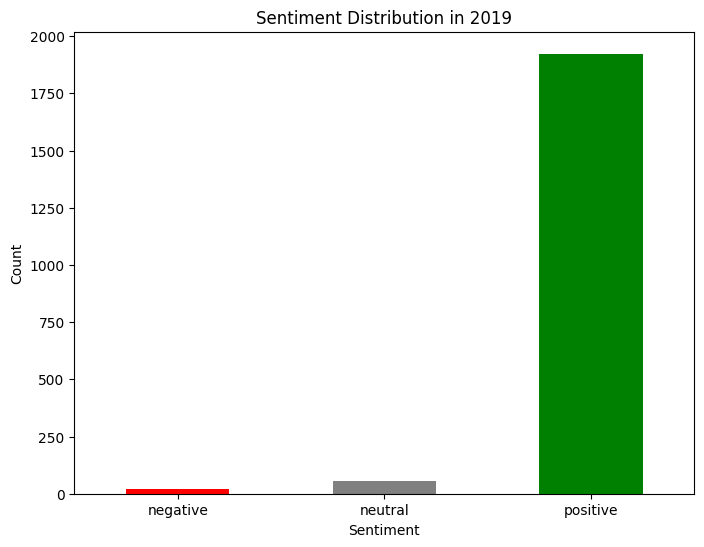

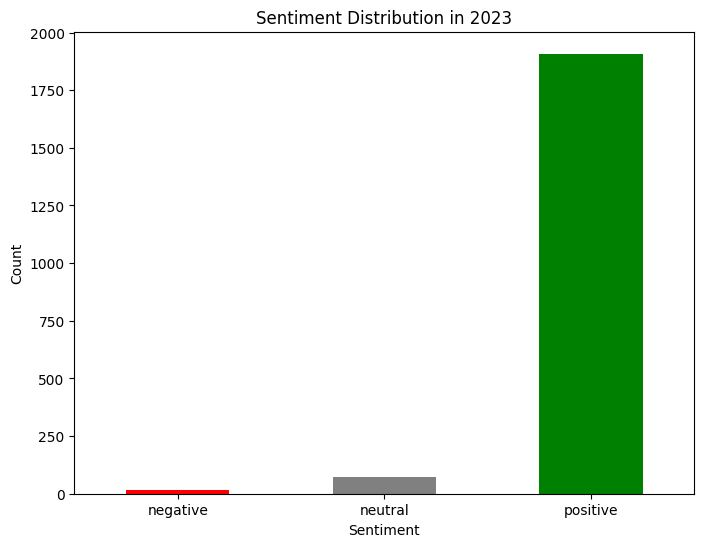

In [ ]:
############################## 1.3 ######################################

import pandas as pd
import matplotlib.pyplot as plt

sentiments_2019 = pd.read_csv('annotated_reviews2019.csv')
sentiments_2023 = pd.read_csv('annotated_reviews2023.csv')

# Συνάρτηση για δημιουργία ιστογράμματος συναισθήματος
def plot_sentiment_distribution(sentiments, year):
    sentiment_counts = sentiments['sentiment'].value_counts()
    sentiment_counts = sentiment_counts.reindex(['negative', 'neutral', 'positive'], fill_value=0)

    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
    plt.title(f'Sentiment Distribution in {year}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Δημιουργία ιστογράμματος για το 2019
plot_sentiment_distribution(sentiments_2019, 2019)

# Δημιουργία ιστογράμματος για το 2023
plot_sentiment_distribution(sentiments_2023, 2023)

Υποερώτημα 1.4 (ΜΠΟΝΟΥΣ):

<ipython-input-9-fd714ceafd1e>:42: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)[listings_columns_2019]
<ipython-input-9-fd714ceafd1e>:42: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)[listings_columns_2019]
<ipython-input-9-fd714ceafd1e>:42: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)[listings_columns_2019]


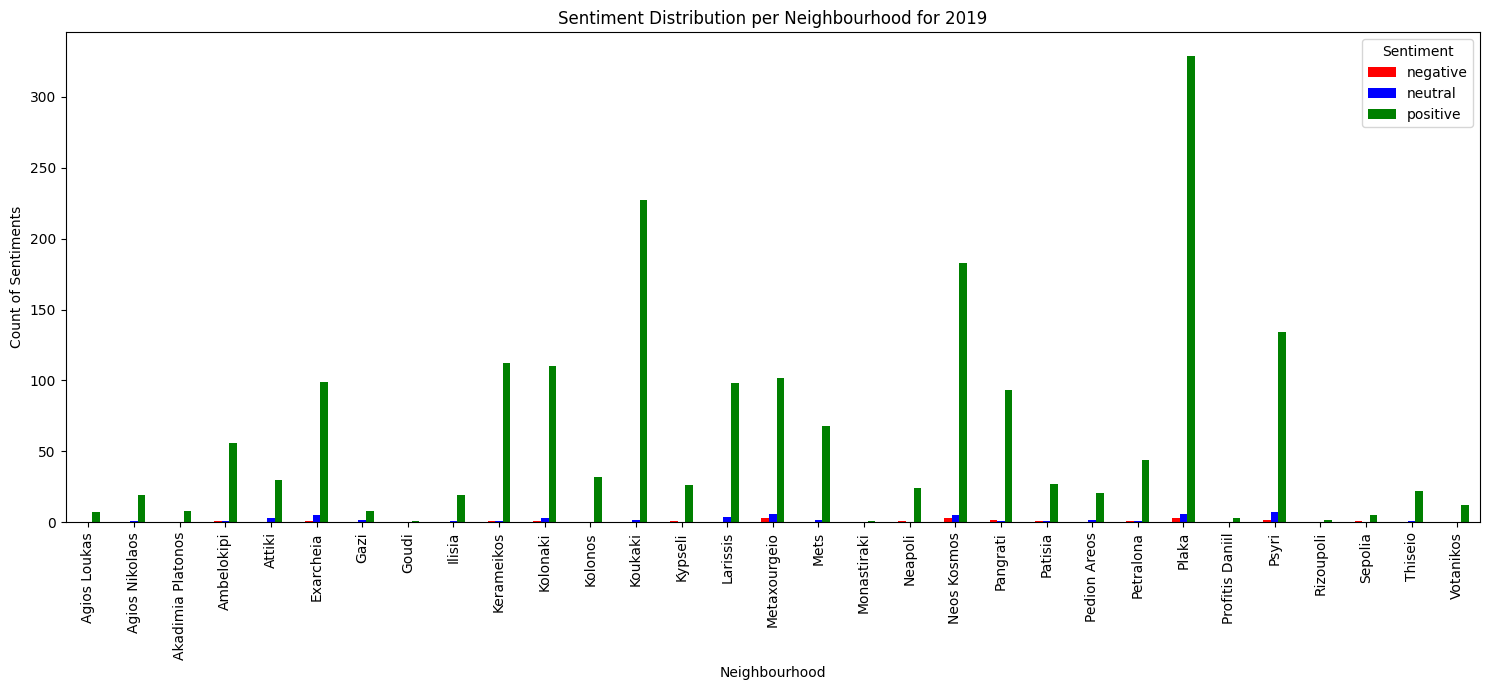

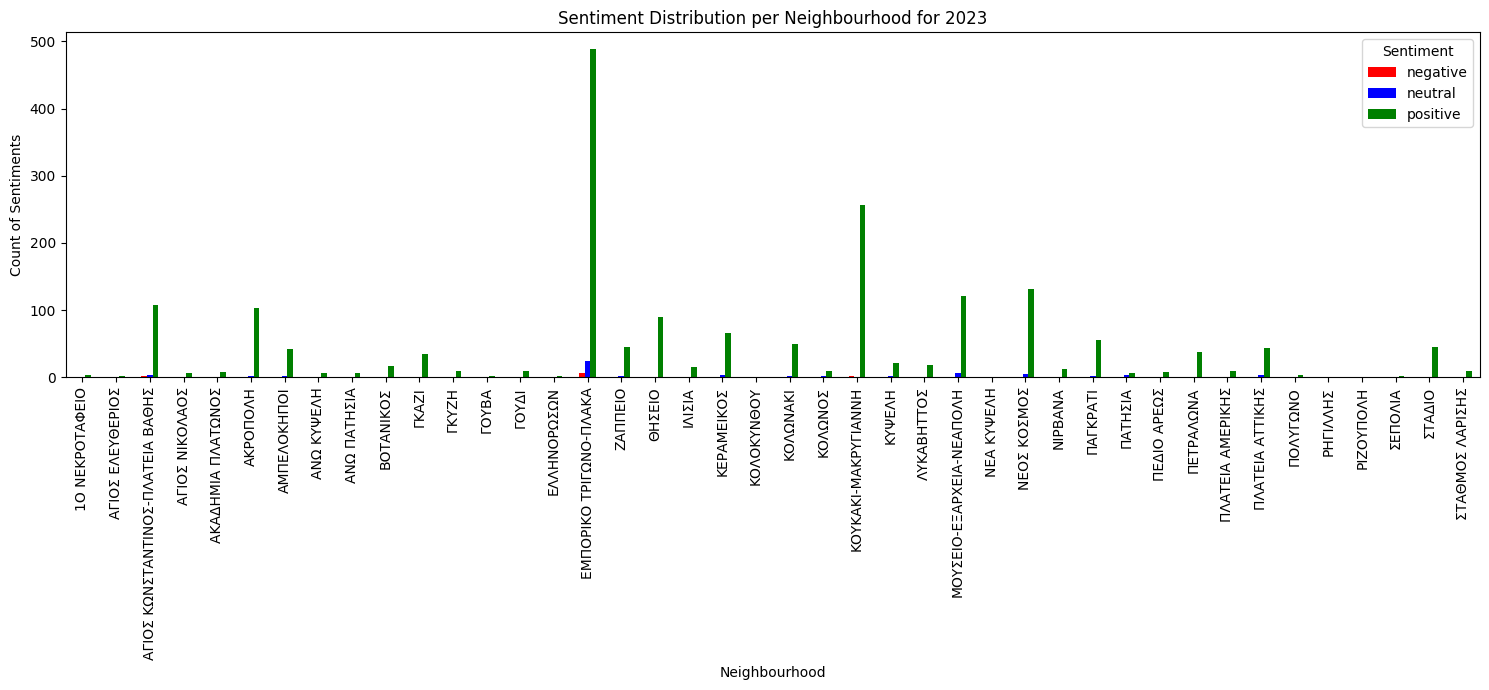

In [ ]:
############################## 1.4 ######################################

import pandas as pd
import numpy as np
import sys
import os

sentiments_2019 = pd.read_csv('annotated_reviews2019.csv')
sentiments_2023 = pd.read_csv('annotated_reviews2023.csv')

# Λίστα με τους κύριους φακέλους για τα έτη 2019 και 2023
main_folder_2019 = "/content/gdrive/My Drive/Tede/data/2019"
main_folder_2023 = "/content/gdrive/My Drive/Tede/data/2023"
main_folders = [main_folder_2019, main_folder_2023]

listings_columns_2019 = ['id', 'neighbourhood']
listings_columns_2023 = ['id', 'neighbourhood_cleansed']

listings_files_2019 = []
listings_files_2023 = []

# Λίστες για την αποθήκευση των δεδομένων ανά έτος
listings_dataframes_2019 = []
listings_dataframes_2023 = []

for year in main_folders:
    # Επιλογή των υποφακέλων
    subfolders = [f for f in os.listdir(year) if os.path.isdir(os.path.join(year, f)) and f != "desktop.ini"]

    # Εξερεύνηση των υποφακέλων και εύρεση των αρχείων CSV
    for folder in subfolders:
        folder_path = os.path.join(year, folder)
        file_path = os.path.join(folder_path, "listings.csv")
        if os.path.exists(file_path):
            if year == main_folder_2019:
                listings_files_2019.append(file_path)
            else:
                listings_files_2023.append(file_path)

    if year == main_folder_2019:
      for file in listings_files_2019:
        df = pd.read_csv(file)[listings_columns_2019]
        listings_dataframes_2019.append(df)
    else:
      for file in listings_files_2023:
        df = pd.read_csv(file)[listings_columns_2023]
        listings_dataframes_2023.append(df)

# Συνένωση των DataFrame ανά έτος
listings2019 = pd.concat(listings_dataframes_2019, ignore_index=True)
listings2023 = pd.concat(listings_dataframes_2023, ignore_index=True)

# Αφαίρεση διπλότυπων
listings2019 = listings2019.drop_duplicates(subset='id')
listings2023 = listings2023.drop_duplicates(subset='id')

# Αφαίρεση γραμμών με NaN τιμές
listings2019 = listings2019.dropna(subset=listings_columns_2019)
listings2023 = listings2023.dropna(subset=listings_columns_2023)

# Μετονομασία της στήλης neighbourhood_cleansed σε neighbourhood
listings2023.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

# Κάνουμε join τα δύο DataFrames στη στήλη 'id'
merged_df_2019 = pd.merge(sentiments_2019, listings2019, on='id', how='inner')
merged_df_2023 = pd.merge(sentiments_2023, listings2023, on='id', how='inner')

import matplotlib.pyplot as plt
import seaborn as sns

# Λειτουργία για την ομαδοποιημένη οπτικοποίηση των συναισθημάτων ανά γειτονιά
def plot_grouped_sentiment_distribution(merged_df, year):
    sentiment_counts = merged_df.groupby(['neighbourhood', 'sentiment']).size().unstack(fill_value=0)

    # Δημιουργία του διαγράμματος
    sentiment_counts.plot(kind='bar', figsize=(15, 7), color=['red', 'blue', 'green'])
    plt.title(f'Sentiment Distribution per Neighbourhood for {year}')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Count of Sentiments')
    plt.legend(title='Sentiment')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Οπτικοποίηση των συναισθημάτων για το 2019
plot_grouped_sentiment_distribution(merged_df_2019, 2019)

# Οπτικοποίηση των συναισθημάτων για το 2023
plot_grouped_sentiment_distribution(merged_df_2023, 2023)


# Ερώτημα 2:

Υποερώτημα 2.1 Train set και Test set:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Φορτώνουμε τα δεδομένα
data_2019 = pd.read_csv('annotated_reviews2019.csv')
data_2023 = pd.read_csv('annotated_reviews2023.csv')

# Συνδυάζουμε τα δεδομένα των δύο ετών
data = pd.concat([data_2019, data_2023], ignore_index=True)

# Χωρίζουμε τα δεδομένα σε train και test σύνολα
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Αποθηκεύουμε τα train και test σύνολα σε αρχεία .tsv
train_data.to_csv('train.tsv', sep='\t', index=False)
test_data.to_csv('test.tsv', sep='\t', index=False)


Υποερώτημα 2.2 TF-IDF:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Φορτώνουμε τα δεδομένα από τα αρχεία .tsv
train_data = pd.read_csv('train.tsv', sep='\t')
test_data = pd.read_csv('test.tsv', sep='\t')

# Υπολογισμός Tf-idf χαρακτηριστικών
vectorizer = TfidfVectorizer(max_features=5000)  # Μπορείτε να αλλάξετε το max_features
X_train_tfidf = vectorizer.fit_transform(train_data['review'])
X_test_tfidf = vectorizer.transform(test_data['review'])

# Αποθήκευση των χαρακτηριστικών και των labels σε αρχεία .pkl
with open('X_train_tfidf.pkl', 'wb') as f:
    pickle.dump((X_train_tfidf, train_data['sentiment']), f)

with open('X_test_tfidf.pkl', 'wb') as f:
    pickle.dump((X_test_tfidf, test_data['sentiment']), f)

Υποερώτημα 2.2 Word Embeddings:

In [ ]:
import gensim.downloader as api
import numpy as np
import pickle
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Φορτώνουμε το προεκπαιδευμένο μοντέλο Word2Vec
word2vec_model = api.load('word2vec-google-news-300')

def get_word2vec_embeddings(text, model, vector_size=300):
    words = word_tokenize(text)
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Υπολογίζουμε τα word embeddings για τα train και test δεδομένα
X_train_w2v = np.array([get_word2vec_embeddings(text, word2vec_model) for text in train_data['review']])
X_test_w2v = np.array([get_word2vec_embeddings(text, word2vec_model) for text in test_data['review']])

# Αποθήκευση των χαρακτηριστικών και των labels σε αρχεία .pkl
with open('X_train_w2v.pkl', 'wb') as f:
    pickle.dump((X_train_w2v, train_data['sentiment']), f)

with open('X_test_w2v.pkl', 'wb') as f:
    pickle.dump((X_test_w2v, test_data['sentiment']), f)

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Υποερωτημα 2.3 Ταξινόμηση και Αξιολόγηση:

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Απενεργοποίηση των προειδοποιήσεων
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Φόρτωση των χαρακτηριστικών Tf-idf και των labels
with open('X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf, y_train = pickle.load(f)

with open('X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf, y_test = pickle.load(f)

# Φόρτωση των χαρακτηριστικών Word embeddings και των labels
with open('X_train_w2v.pkl', 'rb') as f:
    X_train_w2v, y_train = pickle.load(f)

with open('X_test_w2v.pkl', 'rb') as f:
    X_test_w2v, y_test = pickle.load(f)

# Ορίζουμε τους ταξινομητές
svm_clf = SVC()
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

# Λίστες για τα αποτελέσματα
classifiers = [svm_clf, rf_clf, knn_clf]
classifier_names = ['SVM', 'Random Forest', 'KNN']
feature_sets = [(X_train_tfidf, X_test_tfidf), (X_train_w2v, X_test_w2v)]
feature_set_names = ['TF-IDF', 'Word Embeddings']

# Εκπαιδεύουμε και αξιολογούμε κάθε ταξινομητή με κάθε σύνολο χαρακτηριστικών
for feature_set, feature_set_name in zip(feature_sets, feature_set_names):
    X_train, X_test = feature_set
    print(f"Using feature set: {feature_set_name}\n")
    for clf, clf_name in zip(classifiers, classifier_names):
        print(f"Training and evaluating {clf_name}...")
        # Εκπαίδευση
        clf.fit(X_train, y_train)
        # Προβλέψεις
        y_pred = clf.predict(X_test)
        # Αξιολόγηση με cross-validation
        cv_accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
        cv_precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision_macro').mean()
        cv_recall = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall_macro').mean()
        cv_f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro').mean()
        print(f"Cross-Validation Accuracy: {cv_accuracy:.4f}")
        print(f"Cross-Validation Precision: {cv_precision:.4f}")
        print(f"Cross-Validation Recall: {cv_recall:.4f}")
        print(f"Cross-Validation F1 Score: {cv_f1:.4f}")
        print("-" * 50)
    print("\n")


Using feature set: TF-IDF

Training and evaluating SVM...
Cross-Validation Accuracy: 0.9584
Cross-Validation Precision: 0.5695
Cross-Validation Recall: 0.4472
Cross-Validation F1 Score: 0.4763
--------------------------------------------------
Training and evaluating Random Forest...
Cross-Validation Accuracy: 0.9606
Cross-Validation Precision: 0.6768
Cross-Validation Recall: 0.4732
Cross-Validation F1 Score: 0.4975
--------------------------------------------------
Training and evaluating KNN...
Cross-Validation Accuracy: 0.9394
Cross-Validation Precision: 0.5201
Cross-Validation Recall: 0.4603
Cross-Validation F1 Score: 0.4768
--------------------------------------------------


Using feature set: Word Embeddings

Training and evaluating SVM...
Cross-Validation Accuracy: 0.9647
Cross-Validation Precision: 0.7943
Cross-Validation Recall: 0.5134
Cross-Validation F1 Score: 0.5748
--------------------------------------------------
Training and evaluating Random Forest...
Cross-Validation

Παρατηρω οτι το Word Embeddings είναι μάλλον συνολικά καλύτερο στην ακρίβεια και την πρόβλεψη, αν και πιο αργό τόσο στην πρόβλεψη όσο και στην κατασκευή του.

# Ερώτημα 3:

Όσο μεγαλωνει το n το Maximum similarity of neighborhoods αυξανεται κατα πολύ λιγο, το Correlation of neighborhood similarities παραμενει στάσιμο, και το Sum of squared neighborhood similarities αυξάνεται αρκετά.

In [ ]:
from scipy.spatial.distance import cosine
import numpy as np

def get_word_embedding(word, model):
    return model[word] if word in model else None

def get_neighborhood_words(word, model, top_n=10):
    if word in model:
        return model.most_similar(word, topn=top_n)
    else:
        return None

def max_similarity(neighbors1, neighbors2, model):
    similarities = []
    for neighb1, _ in neighbors1:
        for neighb2, _ in neighbors2:
            if neighb1 in model and neighb2 in model:
                sim = 1 - cosine(model[neighb1], model[neighb2])
                similarities.append(sim)
    if similarities:
        return max(similarities)
    else:
        return 0.0

def correlation_of_neighborhood_similarities(neighbors1, neighbors2, model):
    CiNi = []
    CjNi = []
    CiNj = []
    CjNj = []

    # Υπολογισμος similarities CiNi και CjNi
    for neighb1, _ in neighbors1:
        if neighb1 in model:
            for neighb2, _ in neighbors2:
                if neighb2 in model:
                    CiNi.append(1 - cosine(model[neighb1], model[neighb2]))
                    CjNi.append(1 - cosine(model[neighb2], model[neighb1]))

    # Υπολογισμος similarities CiNj και CjNj
    for neighb2, _ in neighbors2:
        if neighb2 in model:
            for neighb1, _ in neighbors1:
                if neighb1 in model:
                    CiNj.append(1 - cosine(model[neighb1], model[neighb2]))
                    CjNj.append(1 - cosine(model[neighb2], model[neighb1]))

    # Υπολογισμος Pearson συντελεστη συσχετισης
    if len(CiNi) > 0 and len(CjNi) > 0:
        bij = np.corrcoef(CiNi, CjNi)[0, 1]
    else:
        bij = 0

    if len(CiNj) > 0 and len(CjNj) > 0:
        bji = np.corrcoef(CiNj, CjNj)[0, 1]
    else:
        bji = 0

    return max(bij, bji)

def sum_of_squared_neighborhood_similarities(neighbors1, neighbors2, model):
    squared_sims1 = []
    squared_sims2 = []

    # Υπολογισμός των τετραγώνων των ομοιοτήτων για τους γείτονες της πρώτης λέξης
    for neighb1, _ in neighbors1:
        for neighb2, _ in neighbors1:
            if neighb1 in model and neighb2 in model:
                sim = 1 - cosine(model[neighb1], model[neighb2])
                squared_sims1.append(sim ** 2)

    # Υπολογισμός των τετραγώνων των ομοιοτήτων για τους γείτονες της δεύτερης λέξης
    for neighb1, _ in neighbors2:
        for neighb2, _ in neighbors2:
            if neighb1 in model and neighb2 in model:
                sim = 1 - cosine(model[neighb1], model[neighb2])
                squared_sims2.append(sim ** 2)

    # Συνολικό άθροισμα των τετραγώνων των ομοιοτήτων
    sum_of_squares1 = sum(squared_sims1)
    sum_of_squares2 = sum(squared_sims2)

    # Υπολογισμός της τετραγωνικής ρίζας του συνολικού αθροίσματος
    result = (sum_of_squares1 + sum_of_squares2) ** 0.5
    return result

# Λέξεις για τις οποίες θα υπολογιστούν οι ομοιότητες
word1 = "forest"
word2 = "fruit"

embedding1 = get_word_embedding(word1, word2vec_model)
embedding2 = get_word_embedding(word2, word2vec_model)

n = 10

neighbors_word1 = get_neighborhood_words(word1, word2vec_model, top_n=n)
neighbors_word2 = get_neighborhood_words(word2, word2vec_model, top_n=n)

if neighbors_word1 is not None and neighbors_word2 is not None:
    print(f"Neighbors of {word1}: {neighbors_word1}")
    print(f"Neighbors of {word2}: {neighbors_word2}")

    max_sim = max_similarity(neighbors_word1, neighbors_word2, word2vec_model)
    corr_sim = correlation_of_neighborhood_similarities(neighbors_word1, neighbors_word2, word2vec_model)
    sum_squared_sim = sum_of_squared_neighborhood_similarities(neighbors_word1, neighbors_word2, word2vec_model)

    print(f"Maximum similarity of neighborhoods: {max_sim}")
    print(f"Correlation of neighborhood similarities: {corr_sim}")
    print(f"Sum of squared neighborhood similarities: {sum_squared_sim}")
else:
    print("One of the words is not in the vocabulary.")


Neighbors of forest: [('forests', 0.8681980967521667), ('forested', 0.7112863659858704), ('forestland', 0.687012255191803), ('forestry', 0.6760391592979431), ('Forests', 0.6706685423851013), ('woodlands', 0.6638579368591309), ('woodland', 0.6417990326881409), ('rainforest', 0.6409221291542053), ('forestlands', 0.6339232325553894), ('tropical_forest', 0.633063018321991), ('virgin_forest', 0.6245838403701782), ('virgin_forests', 0.6084588170051575), ('timber', 0.6075522303581238), ('tropical_rainforest', 0.5989079475402832), ('pine_forests', 0.5961601734161377), ('peat_lands', 0.5954862236976624), ('foresters', 0.5933251976966858), ('tropical_forests', 0.5918326377868652), ('pine_forest', 0.5913091897964478), ('rainforests', 0.5907647609710693), ('pristine_rainforest', 0.5856274366378784), ('conifer_forest', 0.5792431831359863), ('Forest', 0.5776501893997192), ('dense_forest', 0.5747629404067993), ('piñon_juniper', 0.5738565921783447), ('virgin_rainforest', 0.5737561583518982), ('dense_f